In [5]:
import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

batch_size = 256
classes = 10

def Relu(y):
    return torch.maximum(torch.tensor(0), y)

def softmax(y):
    for i in range(len(y)):
        y[i] = torch.exp(y[i])/torch.sum(torch.exp(y[i]))
    return y  
        
def cross_entropy_loss(p, q):
    tmp = torch.zeros((len(q), classes))
    for i in range((len(q))):
        tmp[i][p[i].item()] += 1.0
    
    ans = torch.zeros((len(q)))
    
    for i in range((len(q))):
        ans[i] = torch.sum(-(tmp[i]*torch.log(q[i])))    
    return torch.mean(ans)

def whichclass(pred_y):
    _, label = torch.max(pred_y, 1)
    return label        

def weight_decay(w1, w2):
    lam = 0.0001
    ans = torch.sqrt(torch.sum(w1**2)+torch.sum(w2**2))
    return lam*(ans**2)/2
    

In [6]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5),(0.5))])

fashion_mnist_train = FashionMNIST("FashionMNIST", train=True, download=True, transform=transform)
fashion_mnist_test = FashionMNIST("FashionMNIST", train=False, download=True, transform=transform)

train_loader = DataLoader(fashion_mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(fashion_mnist_test, batch_size=batch_size, shuffle=True)

w1 = torch.normal(0, 0.01, size=(28*28, 256), requires_grad=True)
b1 = torch.zeros(256, requires_grad=True)
w2 = torch.normal(0, 0.01, size=(256, classes), requires_grad=True)
b2 = torch.zeros(classes, requires_grad=True)

epoch_num = 100
optimizer = optim.SGD([w1, b1, w2, b2], lr = 0.02)
running_loss = np.zeros(epoch_num)

for epoch in range(epoch_num):
    for i, (images, labels) in enumerate(train_loader): 
        images = images.view(-1,28*28)
        optimizer.zero_grad()
        with torch.set_grad_enabled(True):
            outputs = torch.matmul(images, w1)+ b1
            outputs = Relu(outputs)
            outputs = torch.matmul(outputs, w2)+ b2
            pred_y = softmax(outputs)                 
            loss = cross_entropy_loss(labels, pred_y) + weight_decay(w1,w2)
            running_loss[epoch] += torch.sum(loss)/batch_size

        loss.backward()
        optimizer.step()                              
        
    print("epoch : %d, loss : %.4lf" % (epoch, running_loss[epoch]))
        
        
print(running_loss)

epoch : 0, loss : 1.2124
epoch : 1, loss : 0.6349
epoch : 2, loss : 0.5449
epoch : 3, loss : 0.4977
epoch : 4, loss : 0.4684
epoch : 5, loss : 0.4483
epoch : 6, loss : 0.4330
epoch : 7, loss : 0.4214
epoch : 8, loss : 0.4119
epoch : 9, loss : 0.4023
epoch : 10, loss : 0.3950
epoch : 11, loss : 0.3884
epoch : 12, loss : 0.3823
epoch : 13, loss : 0.3769
epoch : 14, loss : 0.3718
epoch : 15, loss : 0.3664
epoch : 16, loss : 0.3629
epoch : 17, loss : 0.3585
epoch : 18, loss : 0.3544
epoch : 19, loss : 0.3507
epoch : 20, loss : 0.3475
epoch : 21, loss : 0.3440
epoch : 22, loss : 0.3408
epoch : 23, loss : 0.3373
epoch : 24, loss : 0.3350
epoch : 25, loss : 0.3325
epoch : 26, loss : 0.3292
epoch : 27, loss : 0.3261
epoch : 28, loss : 0.3240
epoch : 29, loss : 0.3214
epoch : 30, loss : 0.3186
epoch : 31, loss : 0.3166
epoch : 32, loss : 0.3140
epoch : 33, loss : 0.3119
epoch : 34, loss : 0.3094
epoch : 35, loss : 0.3074
epoch : 36, loss : 0.3058
epoch : 37, loss : 0.3033
epoch : 38, loss : 0.3

In [8]:
train_acc = 0.0
correct = 0.0
count = 0.0

for i, (images, labels) in enumerate(train_loader):
    images = images.view(-1,28*28)
    outputs = torch.matmul(images, w1)+ b1
    outputs = Relu(outputs)
    outputs = torch.matmul(outputs, w2)+ b2
    pred_label1 = softmax(outputs)
    pred_label = whichclass(pred_label1)
    
    for j in range(len(pred_label)):
        if pred_label[j].int() == labels[j]:
            correct += 1
        
        count += 1

train_acc = correct/count
print("train_acc:",train_acc)

test_acc = 0.0
correct = 0.0
count = 0.0

for i, (images, labels) in enumerate(test_loader):
    images = images.view(-1,28*28)
    outputs = torch.matmul(images, w1)+ b1
    outputs = Relu(outputs)
    outputs = torch.matmul(outputs, w2)+ b2
    pred_label1 = softmax(outputs)
    pred_label = whichclass(pred_label1)
    
    for j in range(len(pred_label)):
        if pred_label[j].int() == labels[j]:
            correct += 1
        
        count += 1

test_acc = correct/count
print("test_acc:",test_acc)

train_acc: 0.9166333333333333
test_acc: 0.8824


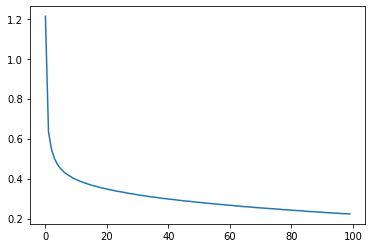

In [9]:
plt.plot(running_loss)